**The features of the dataset are described as follows:**

*F1 Date            
F9 Temperature2  
F2 Lat             
F10 Albedo  
F3 Long              
F11 GeopotentialHS  
F4 Temperature1    
F12 Pressure1  
F5 Humidity1       
F13 Pressure2  
F6 LWdown          
F14 Humidity2  
F7 SWdown          
F15 Wind speed  
F8 Aaerosolindex   
Value Number of infected people*

**Required**  
Please build and evaluate two models:
1. A regression model for the output values.
2. A classification model for the categorized output values.  

Write a report (for both parts) to explain your work and to show your results.

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt


In [ ]:
# !pip install patool
# import patoolib
# patoolib.extract_archive("/content/drive/MyDrive/DatasetHW1.rar", outdir="/content/drive/MyDrive/")

In [4]:
#df=pd.read_csv('/content/drive/MyDrive/DatasetHW1.csv')
df=pd.read_csv('Infection_Dataset_cleaned.csv')
df.head()

,Unnamed: 0,ID,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Value
0,3051,3052,22/01/2020,47.4914,-121.8346,4.6849,0.004741,305.8819,305.5443,-1.6057,275.9406,35.1916,1044.5486,90351.2768,90288.1143,0.004573,90288.1143,1
1,3389,3390,22/01/2020,31.8257,117.2264,1.3147,0.004022,313.3366,286.8496,-1.8308,281.6387,24.9399,309.8847,98497.8600,98975.0940,0.004071,98975.0940,1
2,3390,3391,22/01/2020,40.1824,116.4142,0.9599,0.004042,310.4150,355.6478,-1.0110,283.7595,36.3201,314.4100,98271.7222,98835.0176,0.003854,98835.0176,14
3,3391,3392,22/01/2020,30.0572,107.8740,6.9995,0.005700,325.5123,413.2223,-2.1141,282.6847,14.9820,515.6411,95626.8403,96287.3399,0.002510,96287.3399,6
4,3392,3393,22/01/2020,26.0789,117.9874,7.3174,0.005321,325.3152,515.3695,-1.7381,284.0376,14.4931,590.4265,94457.6359,95359.5988,0.006967,95359.5988,1


In [5]:
df.describe()

,Unnamed: 0,ID,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Value
count,278236.000000,278236.000000,278236.000000,278236.000000,278236.000000,278236.000000,278236.000000,278236.000000,278236.000000,278236.000000,278236.000000,278236.000000,278236.000000,278236.000000,278236.000000,278236.000000,2.782360e+05
mean,394671.997254,394672.997254,36.800401,-81.788603,22.269169,0.010276,373.812955,670.471084,-1.751293,294.698662,14.796148,445.720166,96622.990512,96634.110702,0.010451,96634.110702,1.037856e+03
std,105467.708348,105467.708348,9.111459,40.789082,8.607790,0.004515,45.869090,190.091631,0.771562,8.197379,5.399802,506.725057,5475.575368,5401.860377,0.004610,5401.860377,1.264460e+04
min,3051.000000,3052.000000,-42.882100,-164.035400,-25.555700,0.000316,143.419500,3.923500,-10.923600,231.244900,6.592200,-1.696600,67185.384800,67160.147300,0.000063,67160.147300,1.000000e+00
25%,311686.500000,311687.500000,33.719000,-96.223200,16.460850,0.006448,340.538950,511.526625,-2.188500,289.258500,12.796000,135.425200,95668.107150,95799.816050,0.006471,95799.816050,6.000000e+00
50%,400429.500000,400430.500000,37.752200,-88.096700,23.522600,0.009891,377.185850,714.510950,-1.677700,295.860750,14.229600,284.922600,98326.517850,98328.924250,0.010195,98328.924250,2.900000e+01
75%,484108.250000,484109.250000,41.459900,-81.124900,28.931100,0.014019,410.339325,832.605625,-1.265100,301.029450,15.412300,506.630600,100064.056600,99921.871825,0.014407,99921.871825,1.510000e+02
max,566029.000000,566030.000000,71.706900,178.065000,49.630700,0.024560,541.365300,1212.071200,5.360300,322.377600,79.314600,3429.221100,104780.254600,103915.247100,0.023407,103915.247100,1.274974e+06


In [6]:
df.Value

0            1
1            1
2           14
3            6
4            1
          ... 
278231      82
278232    1808
278233    4173
278234    1922
278235    8606
Name: Value, Length: 278236, dtype: int64

In [7]:
df.drop(columns='F1', inplace=True)

In [8]:
df.head()

,Unnamed: 0,ID,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Value
0,3051,3052,47.4914,-121.8346,4.6849,0.004741,305.8819,305.5443,-1.6057,275.9406,35.1916,1044.5486,90351.2768,90288.1143,0.004573,90288.1143,1
1,3389,3390,31.8257,117.2264,1.3147,0.004022,313.3366,286.8496,-1.8308,281.6387,24.9399,309.8847,98497.8600,98975.0940,0.004071,98975.0940,1
2,3390,3391,40.1824,116.4142,0.9599,0.004042,310.4150,355.6478,-1.0110,283.7595,36.3201,314.4100,98271.7222,98835.0176,0.003854,98835.0176,14
3,3391,3392,30.0572,107.8740,6.9995,0.005700,325.5123,413.2223,-2.1141,282.6847,14.9820,515.6411,95626.8403,96287.3399,0.002510,96287.3399,6
4,3392,3393,26.0789,117.9874,7.3174,0.005321,325.3152,515.3695,-1.7381,284.0376,14.4931,590.4265,94457.6359,95359.5988,0.006967,95359.5988,1


In [9]:
df.drop(columns='ID', inplace=True)

In [10]:
df.head()

,Unnamed: 0,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Value
0,3051,47.4914,-121.8346,4.6849,0.004741,305.8819,305.5443,-1.6057,275.9406,35.1916,1044.5486,90351.2768,90288.1143,0.004573,90288.1143,1
1,3389,31.8257,117.2264,1.3147,0.004022,313.3366,286.8496,-1.8308,281.6387,24.9399,309.8847,98497.8600,98975.0940,0.004071,98975.0940,1
2,3390,40.1824,116.4142,0.9599,0.004042,310.4150,355.6478,-1.0110,283.7595,36.3201,314.4100,98271.7222,98835.0176,0.003854,98835.0176,14
3,3391,30.0572,107.8740,6.9995,0.005700,325.5123,413.2223,-2.1141,282.6847,14.9820,515.6411,95626.8403,96287.3399,0.002510,96287.3399,6
4,3392,26.0789,117.9874,7.3174,0.005321,325.3152,515.3695,-1.7381,284.0376,14.4931,590.4265,94457.6359,95359.5988,0.006967,95359.5988,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9df4e2890>,
      dtype=object)

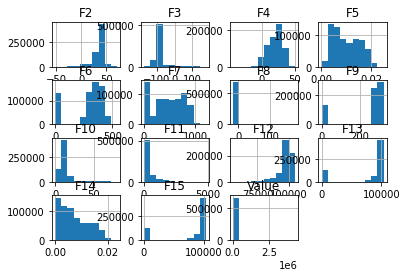

In [ ]:
df.hist()

In [11]:
X=df.drop(columns='Value')

In [12]:
X.head()

,Unnamed: 0,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
0,3051,47.4914,-121.8346,4.6849,0.004741,305.8819,305.5443,-1.6057,275.9406,35.1916,1044.5486,90351.2768,90288.1143,0.004573,90288.1143
1,3389,31.8257,117.2264,1.3147,0.004022,313.3366,286.8496,-1.8308,281.6387,24.9399,309.8847,98497.8600,98975.0940,0.004071,98975.0940
2,3390,40.1824,116.4142,0.9599,0.004042,310.4150,355.6478,-1.0110,283.7595,36.3201,314.4100,98271.7222,98835.0176,0.003854,98835.0176
3,3391,30.0572,107.8740,6.9995,0.005700,325.5123,413.2223,-2.1141,282.6847,14.9820,515.6411,95626.8403,96287.3399,0.002510,96287.3399
4,3392,26.0789,117.9874,7.3174,0.005321,325.3152,515.3695,-1.7381,284.0376,14.4931,590.4265,94457.6359,95359.5988,0.006967,95359.5988


In [13]:
Y=df.Value

In [14]:
Y.head()

0     1
1     1
2    14
3     6
4     1
Name: Value, dtype: int64

In [15]:
from sklearn.preprocessing import normalize

In [16]:
X_norm= normalize(X , axis=0)

In [17]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_norm,Y)

In [18]:
len(X_train)== len(y_train)

True

In [19]:
len(y_test)/ len(X_train)

0.3333333333333333

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
tmp_model=LinearRegression()
tmp_model.fit(X= X_train, y= y_train) 
#tmp_model.evaluate(X_test,y_test)

LinearRegression()

In [22]:
tmp_model.score(X_test,y_test )

0.015185804692479543

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
forest= RandomForestRegressor(20)
forest.fit(X= X_train, y= y_train) 

RandomForestRegressor(n_estimators=20)

In [25]:
forest.score(X_test,y_test)

0.9920629623466443

# using clustering methods to cluster the output into 3 categories

In [26]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [27]:
data_pca=PCA(3).fit(X_train)
clusters=KMeans(3)
clusters.fit(data_pca.transform(X_train))

KMeans(n_clusters=3)

In [29]:
xlabels= clusters.predict(data_pca.transform(X_test))

In [30]:
xlabels

array([2, 1, 1, ..., 0, 0, 2])

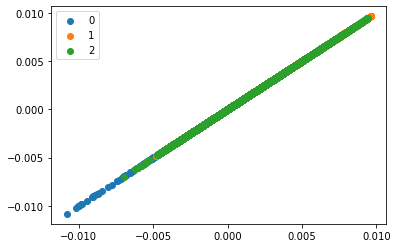

In [32]:
#Getting unique labels
 
u_labels = np.unique(xlabels)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter( X_test[xlabels == i] , X_test[xlabels == i ] , label = i )
plt.legend()
plt.show()

# Classification based on deviding the output range into 3 parts

In [34]:
yt_cat= pd.qcut( y_train , q=3 , duplicates='drop', labels=[0,1,2] ) #, labels=['low','medium','high'] )
ys_cat=pd.qcut( y_test , q=3 , duplicates='drop', labels=[0,1,2] )

In [35]:
yt_cat # y train

154397    0
249395    1
156335    0
201741    2
235477    2
         ..
248028    1
145994    2
160431    1
58159     1
13948     2
Name: Value, Length: 208677, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [36]:
ys_cat # y test

129403    2
135710    2
259096    2
68095     2
192122    2
         ..
177084    0
37043     1
201538    1
199791    1
77902     0
Name: Value, Length: 69559, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [37]:
from sklearn.ensemble import RandomForestClassifier
forest_classifier= RandomForestClassifier(20)

In [38]:
forest_classifier.fit(X_train,yt_cat)

RandomForestClassifier(n_estimators=20)

In [39]:
forest_classifier.score(X_test,ys_cat)

0.9159418623039434